## MNIST Data Set - Basic Approach

### Get the MNIST data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [ ]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [ ]:
mnist.train.images.shape

(55000, 784)

In [ ]:
mnist.test.images.shape

(10000, 784)

In [ ]:
mnist.validation.images.shape

(5000, 784)

### Visualization of Data

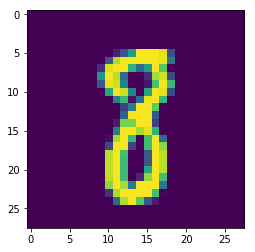

In [ ]:
plt.imshow(mnist.train.images[50].reshape(28,28))

In [ ]:
batch_x,batch_y=mnist.train.next_batch(100)

In [ ]:
batch_x.shape

(100, 784)

In [ ]:
batch_y.shape

(100, 10)

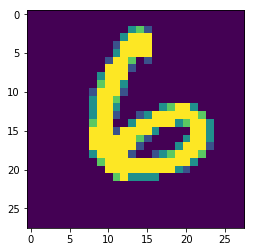

In [ ]:
plt.imshow(batch_x[50].reshape(28,28))

In [ ]:
batch_y[50]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
print(batch_y[50].argmax())

6


### Create the model

In [ ]:
x=tf.placeholder(tf.float32,shape=[None,784])

In [ ]:
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [ ]:
I=tf.add(tf.matmul(x,W),b)

#### Loss and optimizer

In [ ]:
#labels
y=tf.placeholder(tf.float32,[None,10])

In [ ]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=I)
loss_function=tf.reduce_mean(individual_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### Optimizer(gradient descent)

In [ ]:
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [ ]:
train=gdo.minimize(loss_function)

#### Create a session

In [ ]:
init=tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    #train the model for 1000 steps on the training set
    #use build in batch feeder from mnist for convenience
    
    for step in range(5000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y:batch_y})
    
    #training done....now testing
    
    matches=tf.equal(tf.argmax(I,1),tf.argmax(y,1))
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

0.9011


## Perceptron - Multi - Binary

1. Building multilayer neural network - Binary classifier
    - 100 inputs
    - layer1 - 50 neurons
    - layer2 - 20 neurons
    - layer2 - 1

In [ ]:
import tensorflow as tf

In [ ]:
#define placeholders for input and output
x=tf.placeholder(tf.float32,[None,100])
y=tf.placeholder(tf.float32,[None,1])

#### weights and bias for layer 1

In [ ]:
W1=tf.Variable(tf.random_normal([100,50]))
b1=tf.Variable(tf.random_normal([50]))

I1=tf.add(tf.matmul(x,W1),b1)
output1=tf.nn.relu(I1)

#### weights and bias for layer 2

In [ ]:
W2=tf.Variable(tf.random_normal([50,20]))
b2=tf.Variable(tf.random_normal([20]))

I2=tf.add(tf.matmul(output1,W2),b2)
output2=tf.nn.relu(I2)

#### weights and bias for layer 3

In [ ]:
W3=tf.Variable(tf.random_normal([20,1]))
b3=tf.Variable(tf.random_normal([1]))

I3=tf.add(tf.matmul(output2,W3),b3)
output3=tf.nn.relu(I3)

#### calculating the loss and optimizer

In [ ]:
loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output3))
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

In [ ]:
init=tf.global_variables_initializer()

In [ ]:
sess=tf.Session()
sess.run(init)
#run the train and test code here

## Perceptron - Multi - Multiclass

the above code only but changes such as given below are present,

In [ ]:
W3=tf.Variable(tf.random_normal([20,3]))
b3=tf.Variable(tf.random_normal([3]))

I3=tf.add(tf.matmul(output2,W3),b3)

In [ ]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=I3)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=gdo.minimize(loss)

## Performing Binary Class classification on a dataset

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('C:/Users/Administrator/Desktop/Term 3/AI/datasets/data.csv')
data.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


In [ ]:
X=data[['x1','x2']].values
Y=data[['label']].values

In [ ]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

In [ ]:
w1=tf.Variable(tf.random_normal([2,100]))
b1=tf.Variable(tf.random_normal([100]))

I1=tf.add(tf.matmul(x,w1),b1)
output1=tf.nn.relu(I1)

In [ ]:
w2=tf.Variable(tf.random_normal([100,50]))
b2=tf.Variable(tf.random_normal([50]))

I2=tf.add(tf.matmul(output1,w2),b2)
output2=tf.nn.relu(I2)

In [ ]:
w3=tf.Variable(tf.random_normal([50,20]))
b3=tf.Variable(tf.random_normal([20]))

I3=tf.add(tf.matmul(output2,w3),b3)
output3=tf.nn.relu(I3)

In [ ]:
w4=tf.Variable(tf.random_normal([20,10]))
b4=tf.Variable(tf.random_normal([10]))

I4=tf.add(tf.matmul(output3,w4),b4)
output4=tf.nn.relu(I4)

In [ ]:
w5=tf.Variable(tf.random_normal([10,1]))
b5=tf.Variable(tf.random_normal([1]))

I5=tf.add(tf.matmul(output4,w5),b5)
output5=tf.nn.relu(I5)

In [ ]:
individual_loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=output5)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

In [ ]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(train,feed_dict={x:X,y:Y})
        calculated_loss=sess.run(loss,feed_dict={x:X,y:Y})

In [ ]:
print(calculated_loss)

0.6931472


1. Implement a perceprtron - from scratch
2. Implement a mulit-layer nn for binary classification with the full configuration
    - inputs - 250
    - layer1 - 200
    - layer2 - 100
    - layer3 - 50
    - layer4 - 1

In [ ]:
x=tf.placeholder(tf.float32,[None,250])
y=tf.placeholder(tf.float32,[None,1])

In [ ]:
w1=tf.Variable(tf.random_normal([250,200]))
b1=tf.Variable(tf.random_normal([200]))

I1=tf.add(tf.matmul(x,w1),b1)
out1=tf.nn.relu(I1)

In [ ]:
w2=tf.Variable(tf.random_normal([200,100]))
b2=tf.Variable(tf.random_normal([100]))

I2=tf.add(tf.matmul(out1,w2),b2)
out2=tf.nn.relu(I2)

In [ ]:
w3=tf.Variable(tf.random_normal([100,50]))
b3=tf.Variable(tf.random_normal([50]))

I3=tf.add(tf.matmul(out2,w3),b3)
out3=tf.nn.relu(I3)

In [ ]:
w4=tf.Variable(tf.random_normal([50,1]))
b4=tf.Variable(tf.random_normal([1]))

I4=tf.add(tf.matmul(out3,w4),b4)
out4=tf.nn.relu(I4)

In [ ]:
individual_loss=tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=out4)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

## Using the MNIST dataset perform multilayer multiclass classification

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [ ]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Creating the model

In [ ]:
mnist.train.images.shape

(55000, 784)

In [ ]:
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

In [ ]:
w1=tf.Variable(tf.random_normal([784,200]))
b1=tf.Variable(tf.random_normal([200]))

y1=tf.nn.relu(tf.add(tf.matmul(x,w1),b1))

In [ ]:
w2=tf.Variable(tf.random_normal([200,100]))
b2=tf.Variable(tf.random_normal([100]))

y2=tf.nn.relu(tf.add(tf.matmul(y1,w2),b2))

In [ ]:
w3=tf.Variable(tf.random_normal([100,60]))
b3=tf.Variable(tf.random_normal([60]))

y3=tf.nn.relu(tf.add(tf.matmul(y2,w3),b3))

In [ ]:
w4=tf.Variable(tf.random_normal([60,30]))
b4=tf.Variable(tf.random_normal([30]))

y4=tf.nn.relu(tf.add(tf.matmul(y3,w4),b4))

In [ ]:
w5=tf.Variable(tf.random_normal([30,10]))
b5=tf.Variable(tf.random_normal([10]))

y5=tf.add(tf.matmul(y4,w5),b5)

In [ ]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=y5)
loss=tf.reduce_mean(individual_loss)
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=gdo.minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
init=tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    #train the model for 1000 steps on the training set
    #use build in batch feeder from mnist for convenience
    
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y:batch_y})
    
    
    matches=tf.equal(tf.argmax(y5,1),tf.argmax(y,1))
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

0.098
